In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from analysis import plot

%matplotlib inline

RESULT_PATH = "simulation_results"
OUTPUT_PATH = "analysis_results"
overwrite = False

pop_color = plot.pop_color

savefig = True

In [2]:
waves = ['gamma', 'beta']
populations = ['PN', 'PV', 'SST']
n_waves = len(waves)
n_pop = len(populations)

In [3]:
DATA_PATH = os.path.join(OUTPUT_PATH, "InVivoData_lfp_entrainment")

files = os.listdir(DATA_PATH)
session_id = [f.split('_')[0] for f in files]
session_id = list(set(session_id))

In [4]:
wave_idx = [1, 0]

fr_hists = {}
for s in session_id:
    hist_list = []
    for p in populations:
        file = os.path.join(DATA_PATH, '_'.join([s, 'gamma', p, 'fr_hist.npz']))
        hist_list.append(np.load(file)['fr_hist'][0][wave_idx])
    fr_hists[s]  = np.array(hist_list)
    nbins_pha, nbins_amp = fr_hists[s].shape[-2:]

In [5]:
common_clim = False
figsize = (3, 2)

pha_bins = np.linspace(-np.pi, np.pi, nbins_pha + 1)
quantiles = np.linspace(0, 1, nbins_amp + 1)

def plot_hists(fr_hist):
    fig, axs = plt.subplots(n_pop, n_waves, figsize=(figsize[0] * n_waves, figsize[1] * n_pop),
                            squeeze=False, constrained_layout=True)
    for i, p in enumerate(populations):
        if common_clim:
            vmin, vmax = fr_hist[i].min(), fr_hist[i].max()
        else:
            vmin, vmax = None, None
        for j, w in enumerate(waves):
            ax = axs[i, j]
            pcm = ax.pcolormesh(pha_bins, quantiles, fr_hist[i, j].T, vmin=vmin, vmax=vmax)
            ax.set_title(p)
            if i < n_pop - 1:
                ax.get_xaxis().set_visible(False)
            else:
                ax.set_xlabel(w.title() + ' Phase')
                ax.set_xticks((-np.pi, 0, np.pi))
                ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
            if j > 0:
                ax.get_yaxis().set_visible(False)
            else:
                ax.set_ylabel('Amplitude (quantile)')
            if not common_clim:
                plt.colorbar(mappable=pcm, ax=ax, label='Firing rate (% Change)' if j == n_waves - 1 else None, pad=0.02)
        if common_clim:
            plt.colorbar(mappable=pcm, ax=axs[i], label='Firing rate (% Change)', pad=0.02)
    return fig, axs

#### Plot sessions separately

762602078


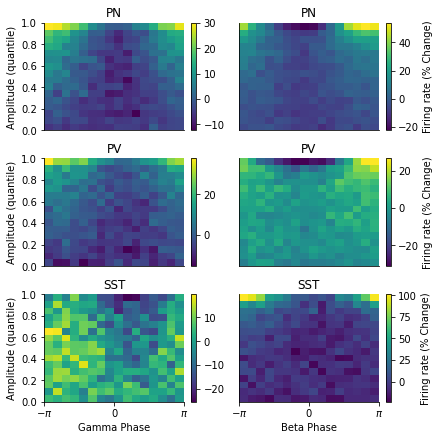

756029989


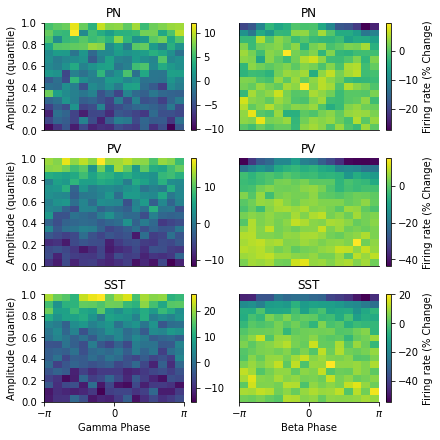

721123822


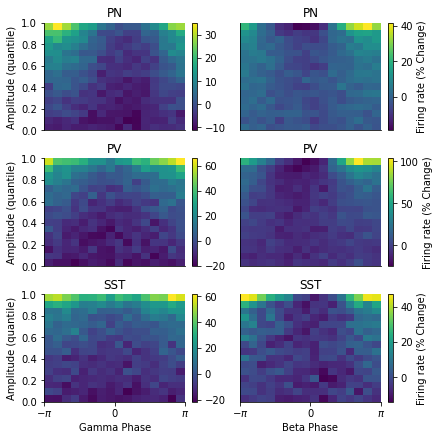

797828357


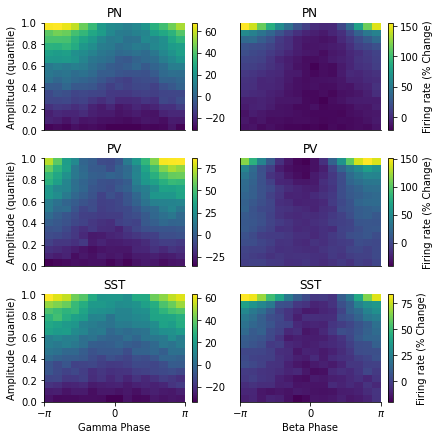

760345702


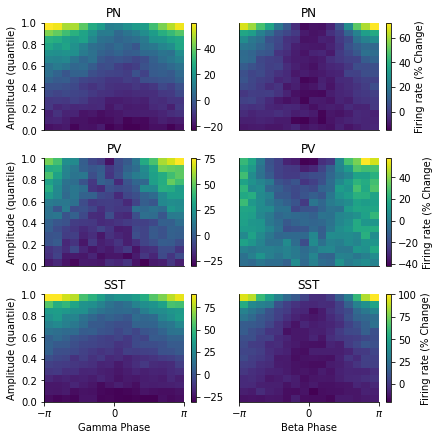

773418906


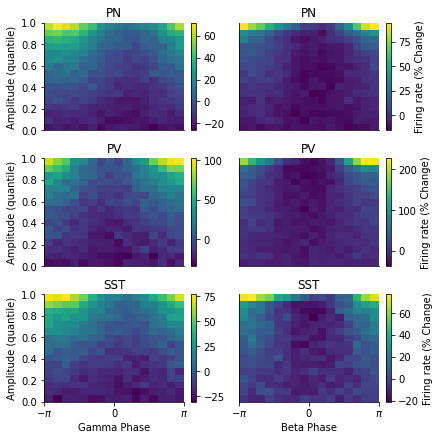

In [6]:
for s, fr_hist in fr_hists.items():
    print(s)
    plot_hists(fr_hist)
    plt.show()

#### Plot sessions combined

In [7]:
session_grp = {
    'PV_tag': ['721123822', '760345702', '797828357'],
    'SST_tag': ['762602078']
}

pop_session = {'PN': session_grp['PV_tag'] + session_grp['SST_tag'],
               'PV': session_grp['PV_tag'], 'SST': session_grp['SST_tag']}

In [8]:
fr_hist_comb = np.zeros((n_pop, n_waves, nbins_pha, nbins_amp))
for p, ss in pop_session.items():
    i = populations.index(p)
    hists = [fr_hists[s][i] for s in ss]
    fr_hist_comb[i] = np.mean(hists, axis=0)

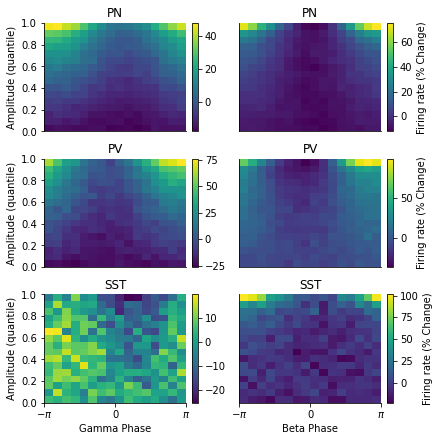

In [9]:
fig, axs = plot_hists(fr_hist_comb)

if savefig:
    plot.savefig(fig, 'Fig_5H')

plt.show()